In [1]:
# Demanding Prediction with LSTM
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
df = pd.read_csv("data\london_merged.csv",
                parse_dates=['timestamp'],
                index_col="timestamp")

In [3]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
df.shape

(17414, 9)

In [5]:
df["hour"] = df.index.hour
df['day_month'] = df.index.day
df["day_week"] = df.index.dayofweek
df["month"] = df.index.month

In [6]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_month,day_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1


*timestamp* - timestamp field for grouping the data

*cnt* - the count of new bike shares

*t1* - real temperature in C

*t2* - temperature in C "feels like"

*hum* - humidity in percentage

*wind_speed* - wind speed in km/h

*weather_code* - category of the weather

*is_holiday* - bool field - 1 holida / 0 non-holiday

*season* - 0- string, 1-summer, 2-fall, 3-winter

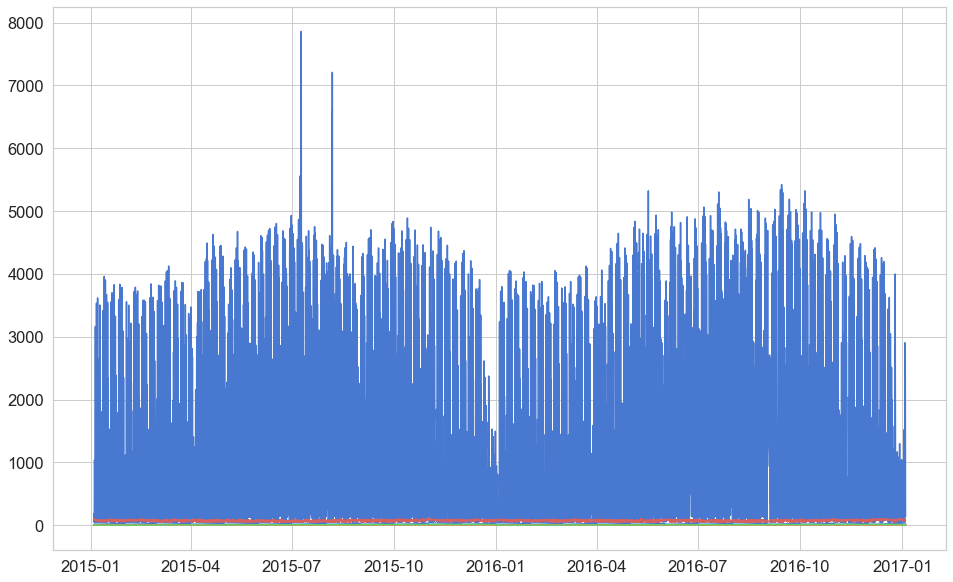

In [7]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.5)

rcParams["figure.figsize"] = 16, 10

plt.plot(df)

Text(0.5, 1.0, 'Monthly')

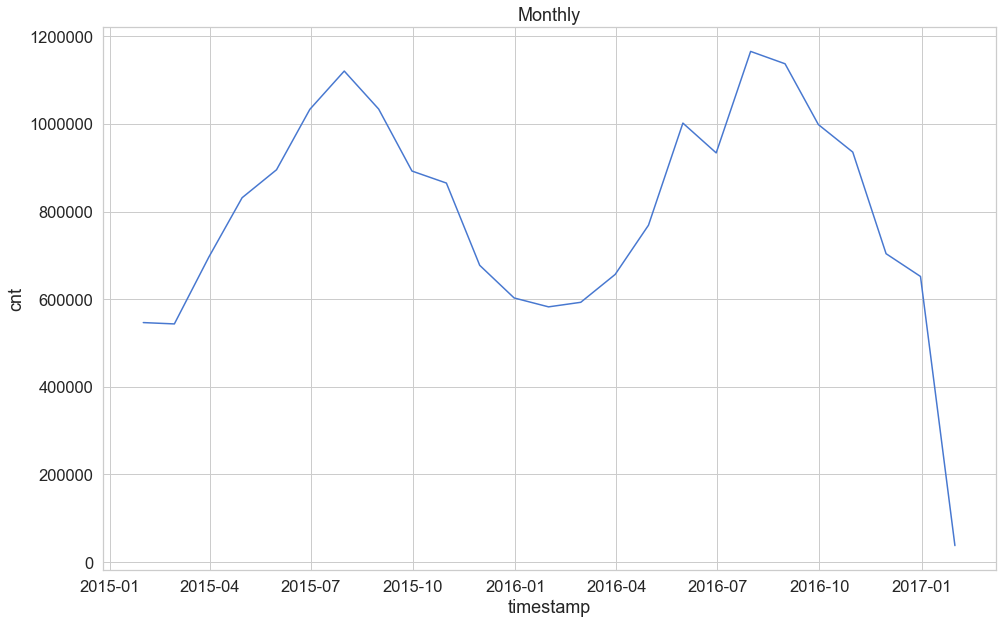

In [8]:
df_month = df.resample('M').sum()
sns.lineplot(x=df_month.index, y="cnt", data=df_month).set_title("Monthly")

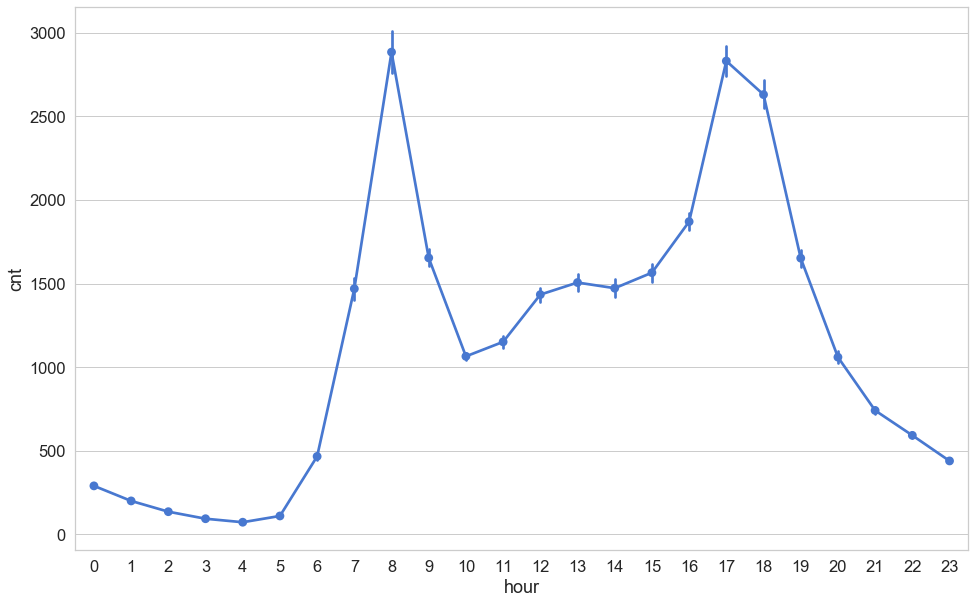

In [9]:
sns.pointplot(data=df, x="hour", y="cnt")

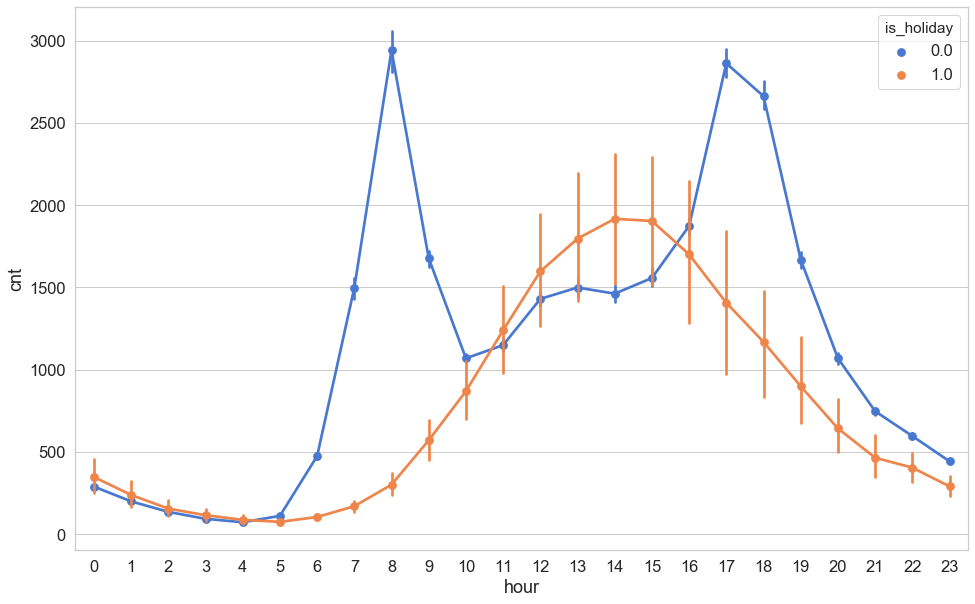

In [10]:
sns.pointplot(data=df, x="hour", hue="is_holiday", y="cnt")

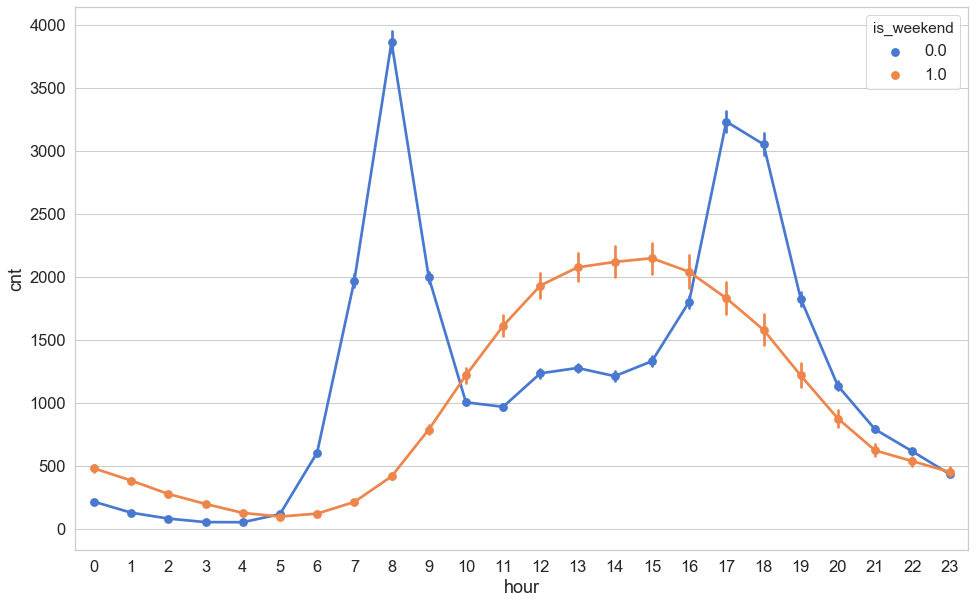

In [11]:
sns.pointplot(data=df, x="hour", hue="is_weekend", y="cnt")

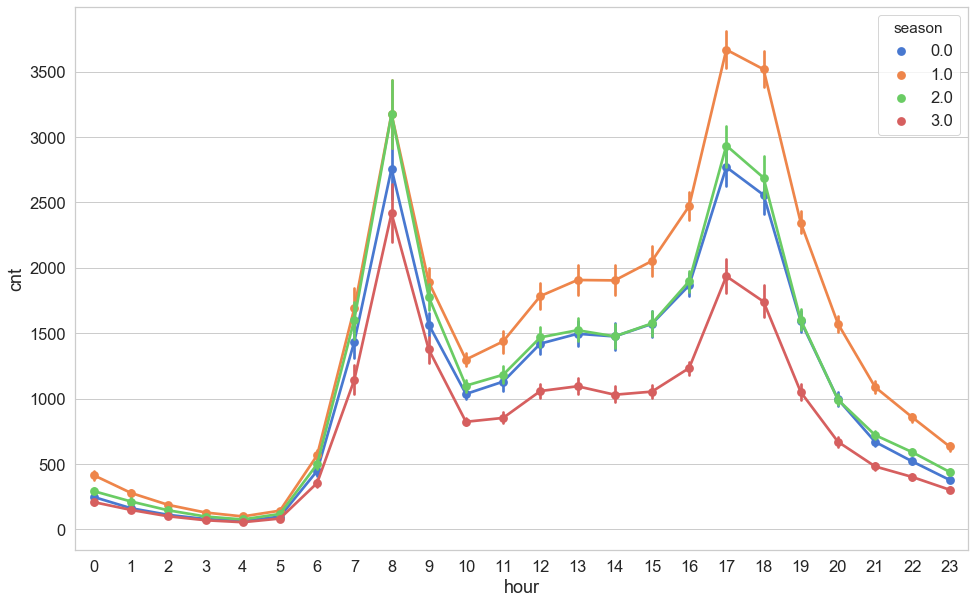

In [15]:
sns.pointplot(data=df, x="hour", hue="season", y="cnt")

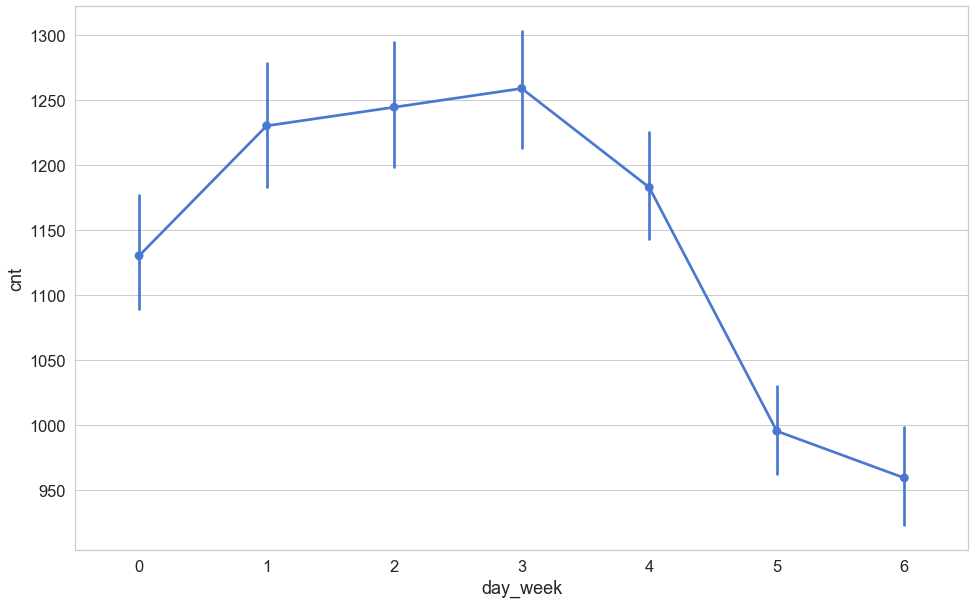

In [19]:
sns.pointplot(data=df, x="day_week", y="cnt")

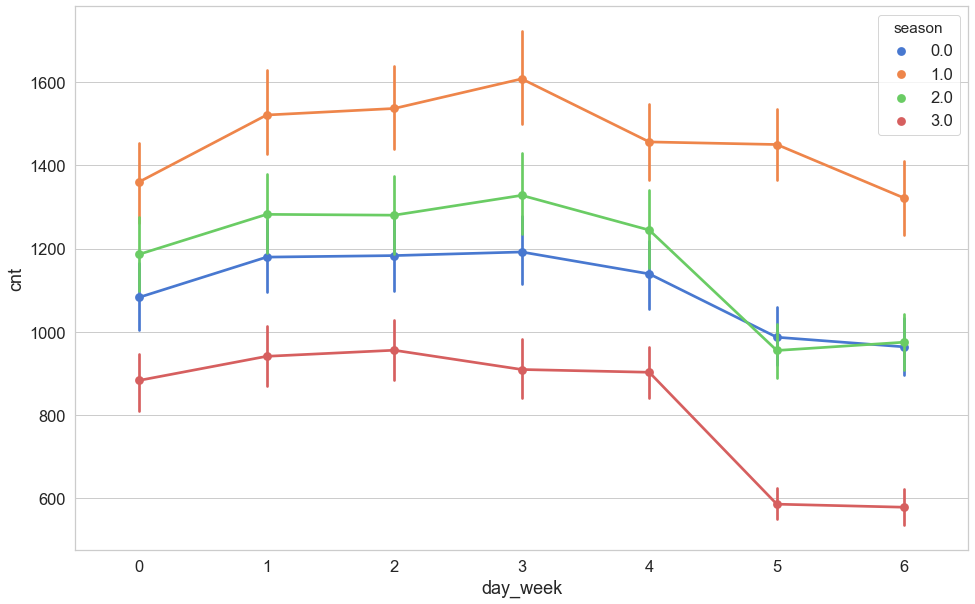

In [20]:
sns.pointplot(data=df, x="day_week", y="cnt", hue="season")

In [21]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

In [22]:
len(train), len(test)

(15672, 1742)

In [30]:
from sklearn.preprocessing import RobustScaler

cols = ['t1', 't2', 'hum', 'wind_speed']

transformer_f = RobustScaler()
transformer_cnt = RobustScaler()

transformer_f = transformer_f.fit(train[cols].to_numpy())
transformer_cnt = transformer_cnt.fit(train[['cnt']])

In [34]:
train.loc[:, cols] = transformer_f.transform( train[cols].to_numpy() )
train["cnt"] = transformer_cnt.transform(train[['cnt']])

R:\Work\Anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
R:\Work\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
train

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_month,day_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,-0.590541,-1.2500,-1.047619,0.975,-0.818182,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,-0.590561,-1.2500,-1.000000,0.975,-0.909091,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,-0.590563,-1.3125,-1.000000,1.150,-1.363636,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,-0.590593,-1.3750,-1.047619,1.325,-1.363636,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,-0.590605,-1.3750,-1.238095,0.975,-0.772727,1.0,0.0,1.0,3.0,4,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-23 03:00:00,-0.590524,-0.6250,-0.571429,0.825,-0.818182,2.0,0.0,1.0,2.0,3,23,6,10
2016-10-23 04:00:00,-0.590556,-0.6250,-0.571429,0.975,-0.818182,2.0,0.0,1.0,2.0,4,23,6,10
2016-10-23 05:00:00,-0.590576,-0.6250,-0.476190,0.675,-1.000000,3.0,0.0,1.0,2.0,5,23,6,10


In [35]:
test.loc[:, cols] = transformer_f.transform( test[cols].to_numpy() )
test["cnt"] = transformer_cnt.transform(test[['cnt']])

TypeError: float() argument must be a string or a number, not 'RobustScaler'